# Introducción a PyTorch

![Status](https://img.shields.io/static/v1.svg?label=Status&message=Finished&color=green)

El siguiente cuaderno está destinado a brindar una breve introducción a los conceptos básicos de PyTorch y prepararlo para escribir sus propias redes neuronales. PyTorch es un marco de aprendizaje automático de código abierto que le permite escribir sus propias redes neuronales y optimizarlas de manera eficiente. Sin embargo, PyTorch no es el único marco de este tipo. Las alternativas a PyTorch incluyen [TensorFlow](https://www.tensorflow.org/), [JAX](https://github.com/google/jax#quickstart-colab-in-the-cloud) y [Caffe](http://caffe.berkeleyvision.org/). Elegimos enseñar PyTorch porque está bien establecido, tiene una enorme comunidad de desarrolladores (desarrollado originalmente por Facebook), es muy flexible y se utiliza especialmente en investigación. Muchos artículos actuales publican su código en PyTorch y, por lo tanto, también es bueno estar familiarizado con PyTorch.


Mientras tanto, TensorFlow (desarrollado por Google) suele ser conocido por ser una biblioteca de aprendizaje profundo de nivel de producción. Aún así, si conoce en profundidad un marco de aprendizaje automático, es muy fácil aprender otro porque muchos de ellos utilizan los mismos conceptos e ideas. Por ejemplo, la versión 2 de TensorFlow se inspiró en gran medida en las características más populares de PyTorch, lo que hace que los marcos sean aún más similares.

Por supuesto, no somos los primeros en crear un tutorial de PyTorch. Hay muchos tutoriales excelentes en línea, incluido el ["blitz de 60 minutos"](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) en el [sitio web oficial de PyTorch](https://pytorch.org/tutorials/). Sin embargo, elegimos crear nuestro propio tutorial que está diseñado para brindarle los conceptos básicos particularmente necesarios para las prácticas.

In [3]:
## Standard libraries
import os
import math
import numpy as np
import time

## Imports for plotting
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
import seaborn as sns

## Progress bar
from tqdm.notebook import tqdm

## The Basics of PyTorch

Comenzaremos revisando los conceptos básicos de PyTorch. Como requisito previo, recomendamos estar familiarizado con el paquete "numpy", ya que la mayoría de los marcos de aprendizaje automático se basan en conceptos muy similares. Si aún no estás familiarizado con numpy, no te preocupes: aquí tienes un [tutorial](https://numpy.org/devdocs/user/quickstart.html) para seguir.

Entonces, comencemos importando PyTorch. El paquete se llama `torch`, según su marco original [Torch](http://torch.ch/). Como primer paso, podemos comprobar su versión:

In [4]:
import torch
print("Using torch", torch.__version__)

Using torch 2.5.1+cu121


Al momento de escribir este tutorial (finales de octubre de 2023), la versión estable actual es `2.1.0`. En general, se recomienda mantener la versión de PyTorch actualizada a la más nueva. Si ve un número de versión inferior a 2.0, asegúrese de haber instalado el entorno correcto o pregunte a uno de sus asistentes técnicos. En caso de que se publique PyTorch 2.2 o posterior durante el curso, no se preocupe. La interfaz entre las versiones de PyTorch no cambia demasiado y, por lo tanto, todo el código también debería poder ejecutarse con versiones más nuevas.

Como en todos los marcos de aprendizaje automático, PyTorch proporciona funciones estocásticas, como generar números aleatorios. Sin embargo, una muy buena práctica es configurar el código para que sea reproducible con exactamente los mismos números aleatorios. Es por eso que ponemos una semilla a continuación.

In [5]:
torch.manual_seed(42) # Setting the seed

### Tensores

Los tensores son el equivalente de PyTorch a las matrices Numpy, y además también admiten la aceleración de GPU (más sobre esto más adelante).
El nombre "tensor" es una generalización de conceptos que ya conoces. Por ejemplo, un vector es un tensor unidimensional y una matriz un tensor bidimensional. Cuando trabajemos con redes neuronales, usaremos tensores de varias formas y número de dimensiones.

Las funciones más comunes que conoces de numpy también se pueden usar en tensores. En realidad, dado que las matrices numpy son tan similares a los tensores, podemos convertir la mayoría de los tensores en matrices numpy (y viceversa), pero no lo necesitamos con demasiada frecuencia.

#### Inicialización

Primero comencemos viendo diferentes formas de crear un tensor. Hay muchas opciones posibles, la más sencilla es llamar a `torch.Tensor` pasando la forma deseada como argumento de entrada:

In [6]:
x = torch.Tensor(2, 3, 4)
print(x)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])


La función `torch.Tensor` asigna memoria para el tensor deseado, pero reutiliza cualquier valor que ya haya estado en la memoria. Para asignar valores directamente al tensor durante la inicialización, existen muchas alternativas que incluyen:

* `torch.zeros`: Crea un tensor lleno de ceros.
* `torch.ones`: Crea un tensor lleno de unos.
* `torch.rand`: Crea un tensor con valores aleatorios muestreados uniformemente entre 0 y 1.
* `torch.randn`: Crea un tensor con valores aleatorios muestreados de una distribución normal con media 0 y varianza 1.
* `torch.arange`: Crea un tensor que contiene los valores $N,N+1,N+2,...,M$.
* `torch.Tensor` (lista de entrada): crea un tensor a partir de los elementos de la lista que se proporciona.

In [7]:
# Create a tensor from a (nested) list
x = torch.Tensor([[1, 2], [3, 4]])
print(x)

tensor([[1., 2.],
        [3., 4.]])


In [10]:
# Create a tensor with random values between 0 and 1 with the shape [2, 3, 4]
x = torch.rand(2, 3, 4)
print(x)

tensor([[[0.7539, 0.1952, 0.0050, 0.3068],
         [0.1165, 0.9103, 0.6440, 0.7071],
         [0.6581, 0.4913, 0.8913, 0.1447]],

        [[0.5315, 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147, 0.2036],
         [0.2018, 0.2018, 0.9497, 0.6666]]])


Puedes obtener la forma de un tensor de la misma manera que en numpy (`x.shape`), o usando el método `.size`:

In [11]:
shape = x.shape
print("Shape:", x.shape)

size = x.size()
print("Size:", size)

dim1, dim2, dim3 = x.size()
print("Size:", dim1, dim2, dim3)

Shape: torch.Size([2, 3, 4])
Size: torch.Size([2, 3, 4])
Size: 2 3 4


#### Tensor a Numpy y Numpy a tensor

Los tensores se pueden convertir en matrices de NumPy y vice versa. Para transformar una matriz numpy en un tensor, podemos usar la función `torch.from_numpy`:

In [12]:
np_arr = np.array([[1, 2], [3, 4]])
tensor = torch.from_numpy(np_arr)

print("Numpy array:", np_arr)
print("PyTorch tensor:", tensor)

Numpy array: [[1 2]
 [3 4]]
PyTorch tensor: tensor([[1, 2],
        [3, 4]])


Para transformar un tensor de PyTorch en una matriz numpy, podemos usar la función `.numpy()` en tensores:

In [13]:
tensor = torch.arange(4)
np_arr = tensor.numpy()

print("PyTorch tensor:", tensor)
print("Numpy array:", np_arr)

PyTorch tensor: tensor([0, 1, 2, 3])
Numpy array: [0 1 2 3]


La conversión de tensores a numpy requiere que el tensor esté en la CPU y no en la GPU (más información sobre la compatibilidad con GPU en una sección posterior). En caso de que tenga un tensor en GPU, debe llamar a `.cpu()` en el tensor de antemano. Por lo tanto, obtienes una línea como `np_arr = tensor.cpu().numpy()`.

#### Operaciones

La mayoría de las operaciones que existen en numpy también existen en PyTorch. Puede encontrar una lista completa de operaciones en la [documentación de PyTorch](https://pytorch.org/docs/stable/tensors.html#), pero revisaremos las más importantes aquí.

La operación más sencilla es sumar dos tensores:

In [24]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
y = x1 + x2

print("X1", x1)
print("X2", x2)
print("Y", y)

X1 tensor([[0.5014, 0.3139, 0.4654],
        [0.1612, 0.1568, 0.2083]])
X2 tensor([[0.3289, 0.1054, 0.9192],
        [0.4008, 0.9302, 0.6558]])
Y tensor([[0.8302, 0.4193, 1.3846],
        [0.5620, 1.0870, 0.8641]])


Llamar a `x1 + x2` crea un nuevo tensor que contiene la suma de las dos entradas. Sin embargo, también podemos utilizar operaciones in situ que se aplican directamente a la memoria de un tensor. Por lo tanto cambiamos los valores de `x2` sin posibilidad de volver a acceder a los valores de `x2` antes de la operación. A continuación se muestra un ejemplo:

In [25]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
print("X1 (antes)", x1)
print("X2 (antes)", x2)

x2.add_(x1)
print("X1 (después)", x1)
print("X2 (después)", x2)

X1 (antes) tensor([[0.0766, 0.8460, 0.3624],
        [0.3083, 0.0850, 0.0029]])
X2 (antes) tensor([[0.6431, 0.3908, 0.6947],
        [0.0897, 0.8712, 0.1330]])
X1 (después) tensor([[0.0766, 0.8460, 0.3624],
        [0.3083, 0.0850, 0.0029]])
X2 (después) tensor([[0.7197, 1.2368, 1.0571],
        [0.3980, 0.9562, 0.1359]])


Las operaciones *inplace* suelen estar marcadas con un sufijo de guión bajo (por ejemplo, "add_" en lugar de "add").

Otra operación común tiene como objetivo cambiar la forma de un tensor. Un tensor de tamaño (2,3) se puede reorganizar en cualquier otra forma con el mismo número de elementos (por ejemplo, un tensor de tamaño (6), o (3,2), ...). En PyTorch, esta operación se llama "view":

In [26]:
x = torch.arange(6)
print("X", x)

X tensor([0, 1, 2, 3, 4, 5])


In [27]:
x = x.view(2, 3)
print("X", x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


In [35]:
x = x.permute(1, 0) # Swapping dimension 0 and 1
print("X", x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


Otras operaciones comúnmente utilizadas incluyen las multiplicaciones de matrices, que son esenciales para las redes neuronales. Muy a menudo, tenemos un vector de entrada $\mathbf{x}$, que se transforma utilizando una matriz de peso aprendida $\mathbf{W}$. Existen múltiples formas y funciones para realizar la multiplicación de matrices, algunas de las cuales enumeramos a continuación:

* `torch.matmul`: Realiza el producto matricial sobre dos tensores, donde el comportamiento específico depende de las dimensiones. Si ambas entradas son matrices (tensores bidimensionales), realiza el producto matricial estándar. Para entradas de dimensiones superiores, la función admite la transmisión (para obtener más detalles, consulte la [documentación](https://pytorch.org/docs/stable/generated/torch.matmul.html?highlight=matmul#torch.matmul)). También se puede escribir como `a @ b`, similar a numpy.
* `torch.mm`: realiza el producto matricial sobre dos matrices, pero no admite *broadcasting* (consulte [documentación](https://pytorch.org/docs/stable/generated/torch.mm.html?highlight=torch%20mm#torch.mm)).
* `torch.bmm`: Realiza el producto matriz con una dimensión de lote de soporte. Si el primer tensor $T$ tiene forma ($b\times n\times m$), y el segundo tensor $R$ ($b\times m\times p$), la salida $O$ tiene forma ( $b\times n\times p$), y se ha calculado realizando $b$ multiplicaciones matriciales de las submatrices de $T$ y $R$: $O_i = T_i @ R_i$
* `torch.einsum`: Realiza multiplicaciones de matrices y más (es decir, sumas de productos) utilizando la convención de suma de Einstein.

Normalmente usamos `torch.matmul` o `torch.bmm`. Podemos probar una multiplicación de matrices con `torch.matmul` a continuación.

In [36]:
x = torch.arange(6)
x = x.view(2, 3)
print("X", x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


In [37]:
W = torch.arange(9).view(3, 3) # También podemos apilar múltiples operaciones en una sola línea
print("W", W)

W tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [38]:
h = torch.matmul(x, W) # ¡Verifica el resultado calculándolo a mano también!
print("h", h)

h tensor([[15, 18, 21],
        [42, 54, 66]])


#### Indexación

A menudo nos encontramos en la situación en la que necesitamos seleccionar una parte de un tensor. La indexación funciona igual que en numpy, así que intentémoslo:

In [40]:
x = torch.arange(12).view(3, 4)
print("X", x)

X tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [41]:
print(x[:, 1])   # Second column

tensor([1, 5, 9])


In [42]:
print(x[0])      # First row

tensor([0, 1, 2, 3])


In [43]:
print(x[:2, -1]) # First two rows, last column

tensor([3, 7])


In [44]:
print(x[1:3, :]) # Middle two rows

tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


### Gráfico de computación dinámica y retropropagación

Una de las principales razones para usar PyTorch en proyectos de aprendizaje profundo es que podemos obtener automáticamente **gradientes/derivadas** de las funciones que definimos. Usaremos principalmente PyTorch para implementar redes neuronales, y son simplemente funciones sofisticadas. Si usamos matrices de pesos en nuestra función que queremos aprender, entonces se llaman **parámetros** o simplemente **pesos**.

Si nuestra red neuronal generara un único valor escalar, hablaríamos de tomar la **derivada**, pero verá que muy a menudo tendremos **múltiples** variables de salida ("valores"); en ese caso hablamos de **gradientes**. Es un término más general.

Dada una entrada $\mathbf{x}$, definimos nuestra función **manipulando** esa entrada, generalmente mediante multiplicaciones de matrices con matrices de peso y sumas con los llamados vectores de sesgo. A medida que manipulamos nuestra entrada, automáticamente creamos un **gráfico computacional**. Este gráfico muestra cómo llegar a nuestra salida a partir de nuestra entrada.
PyTorch es un marco **definido por ejecución**; esto significa que podemos hacer nuestras manipulaciones y PyTorch realizará un seguimiento de ese gráfico por nosotros. Por lo tanto, creamos un gráfico de cálculo dinámico a lo largo del camino.

Entonces, para resumir: lo único que tenemos que hacer es calcular la **salida**, y luego podemos pedirle a PyTorch que obtenga automáticamente los **gradientes**.

> **Nota: ¿Por qué queremos gradientes?** Considere que hemos definido una función, una red neuronal, que se supone que calcula una determinada salida $y$ para un vector de entrada $\mathbf{x}$. Luego definimos una **medida de error** que nos dice qué tan equivocada está nuestra red; qué tan malo es predecir la salida $y$ a partir de la entrada $\mathbf{x}$. Con base en esta medida de error, podemos usar los gradientes para **actualizar** los pesos $\mathbf{W}$ que fueron responsables de la salida, de modo que la próxima vez que presentemos la entrada $\mathbf{x}$ a nuestro red, la salida estará más cerca de lo que queremos.

Lo primero que tenemos que hacer es especificar qué tensores requieren gradientes. De forma predeterminada, cuando creamos un tensor, no requiere gradientes.

In [45]:
x = torch.ones((3,))
print(x.requires_grad)

False


Podemos cambiar esto para un tensor existente usando la función `requires_grad_()` (el guión bajo indica que se trata de una operación in situ). Alternativamente, al crear un tensor, puedes pasar el argumento `requires_grad=True` a la mayoría de los inicializadores que hemos visto anteriormente.

In [46]:
x.requires_grad_(True)
print(x.requires_grad)

True


Para familiarizarnos con el concepto de gráfico de cálculo, crearemos uno para la siguiente función:

$$y = \frac{1}{\ell(x)}\sum_i \left[(x_i + 2)^2 + 3\right],$$

donde usamos $\ell(x)$ para denotar el número de elementos en $x$. En otras palabras, aquí estamos tomando una media de la operación dentro de la suma. Podrías imaginar que $x$ son nuestros parámetros y queremos optimizar (maximizar o minimizar) la salida $y$. Para esto queremos obtener los gradientes $\partial y / \partial \mathbf{x}$. Para nuestro ejemplo, usaremos $\mathbf{x}=[0,1,2]$ como nuestra entrada.

In [47]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True) # Only float tensors can have gradients
print("X", x)

X tensor([0., 1., 2.], requires_grad=True)


Ahora construyamos el gráfico de cálculo paso a paso. Puede combinar varias operaciones en una sola línea, pero las separaremos aquí para comprender mejor cómo se agrega cada operación al gráfico de cálculo.

In [48]:
a = x + 2
b = a ** 2
c = b + 3
y = c.mean()
print("Y", y)

Y tensor(12.6667, grad_fn=<MeanBackward0>)


Usando las declaraciones anteriores, hemos creado un gráfico de cálculo similar a la siguiente figura:

<center style="ancho: 100%"><img src="https://github.com/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/tutorial2/pytorch_computation_graph.svg?raw=1" width="200px "></center>

Calculamos $a$ en función de las entradas $x$ y la constante $2$, $b$ es $a$ al cuadrado, y así sucesivamente. La visualización es una abstracción de las dependencias entre entradas y salidas de las operaciones que hemos aplicado.
Cada nodo del gráfico de cálculo ha definido automáticamente una función para calcular los gradientes con respecto a sus entradas, `grad_fn`. Puedes ver esto cuando imprimimos el tensor de salida $y$. Es por eso que el gráfico de cálculo generalmente se visualiza en la dirección inversa (las flechas apuntan desde el resultado a las entradas). Podemos realizar retropropagación en el gráfico de cálculo llamando a la función `backward()` en la última salida, que calcula efectivamente los gradientes para cada tensor que tiene la propiedad `requires_grad=True`:

In [49]:
y.backward()

`x.grad` ahora contendrá el gradiente $\partial y/ \partial \mathcal{x}$, y este gradiente indica cómo un cambio en $\mathbf{x}$ afectará la salida $y$ dada la entrada actual $ \mathbf{x}=[0,1,2]$:

In [50]:
print(x.grad)

tensor([1.3333, 2.0000, 2.6667])


También podemos verificar estos gradientes a mano. Calcularemos los gradientes usando la regla de la cadena, de la misma forma que lo hizo PyTorch:

$$\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial c_i}\frac{\partial c_i}{\partial b_i}\frac{\partial b_i}{\partial a_i }\frac{\partial a_i}{\partial x_i}$$

Tenga en cuenta que hemos simplificado esta ecuación a notación de índice y utilizando el hecho de que todas las operaciones además de la media no combinan los elementos en el tensor. Las derivadas parciales son:

$$
\frac{\partial a_i}{\partial x_i} = 1,\hspace{1cm}
\frac{\partial b_i}{\partial a_i} = 2\cdot a_i\hspace{1cm}
\frac{\partial c_i}{\partial b_i} = 1\hspace{1cm}
\frac{\partial y}{\partial c_i} = \frac{1}{3}
$$

Por lo tanto, siendo la entrada $\mathbf{x}=[0,1,2]$, nuestros gradientes son $\partial y/\partial \mathbf{x}=[4/3,2,8/3]$ . La celda de código anterior debería haber impreso el mismo resultado.

Una característica crucial de PyTorch es la compatibilidad con GPU, abreviatura de Unidad de procesamiento de gráficos. Una GPU puede realizar miles de pequeñas operaciones en paralelo, lo que la hace muy adecuada para realizar grandes operaciones matriciales en redes neuronales. Al comparar las GPU con las CPU, podemos enumerar las siguientes diferencias principales (crédito: [Kevin Krewell, 2009](https://blogs.nvidia.com/blog/2009/12/16/whats-the-difference-between-a-cpu-and-a-gpu/))

<center style="ancho: 100%"><img src="https://github.com/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/tutorial2/comparison_CPU_GPU.png?raw=1" width="700px "></center>

Las CPU y las GPU tienen diferentes ventajas y desventajas, razón por la cual muchas computadoras contienen ambos componentes y los utilizan para diferentes tareas. En caso de que no esté familiarizado con las GPU, puede leer más detalles en esta [publicación del blog de NVIDIA](https://blogs.nvidia.com/blog/2009/12/16/whats-the-difference-between-a -cpu-and-a-gpu/) o [aquí](https://www.intel.com/content/www/us/en/products/docs/processors/what-is-a-gpu.html).

Las GPU pueden acelerar el entrenamiento de su red hasta un factor de $100$, lo cual es esencial para redes neuronales grandes. PyTorch implementa muchas funciones para admitir GPU (principalmente las de NVIDIA debido a las bibliotecas [CUDA](https://developer.nvidia.com/cuda-zone) y [cuDNN](https://developer.nvidia.com/cudnn)). Primero, verifiquemos si tienes una GPU disponible:

In [51]:
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

Is the GPU available? True


Si tiene una GPU en su computadora pero el comando anterior devuelve `False`, asegúrese de tener instalada la versión CUDA correcta. En Google Colab, asegúrese de haber seleccionado una GPU en su configuración de tiempo de ejecución (en el menú, marque en `Tiempo de ejecución -> Cambiar tipo de tiempo de ejecución`).

De forma predeterminada, todos los tensores que crea se almacenan en la CPU. Podemos enviar un tensor a la GPU usando la función `.to(...)` o `.cuda()`. Sin embargo, suele ser una buena práctica definir un objeto `device` en el código que apunte a la GPU, si tiene una, y en caso contrario a la CPU. Luego, puede escribir su código con respecto a este objeto de dispositivo y le permitirá ejecutar el mismo código tanto en un sistema solo con CPU como en uno con GPU. Probémoslo a continuación. Podemos especificar el dispositivo de la siguiente manera:

In [52]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cuda


Ahora creemos un tensor y empujémoslo al dispositivo:

In [53]:
x = torch.zeros(2, 3)
x = x.to(device)
print("X", x)

X tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


En caso de que tenga una GPU, ahora debería ver el atributo `device='cuda:0'` impreso junto a su tensor. El cero al lado de cuda indica que este es el dispositivo GPU número cero en su computadora. PyTorch también admite sistemas multi-GPU, pero esto solo lo necesitará una vez que tenga redes muy grandes para entrenar (si está interesado, consulte la [documentación de PyTorch](https://pytorch.org/docs/stable/distributed.html#distributed-basics)). También podemos comparar el tiempo de ejecución de una multiplicación de matrices grande en la CPU con una operación en la GPU:

In [54]:
x = torch.randn(5000, 5000)

## CPU version
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")

## GPU version
if torch.cuda.is_available():
    x = x.to(device)
    _ = torch.matmul(x, x)  # First operation to 'burn in' GPU
    # CUDA is asynchronous, so we need to use different timing functions
    start = torch.cuda.Event(enable_timing=True)
    end = torch.cuda.Event(enable_timing=True)
    start.record()
    _ = torch.matmul(x, x)
    end.record()
    torch.cuda.synchronize()  # Waits for everything to finish running on the GPU
    print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s")  # Milliseconds to seconds

CPU time: 1.63066s
GPU time: 0.07184s


Dependiendo del tamaño de la operación y de la CPU/GPU de su sistema, la velocidad de esta operación puede ser >50x. Como las operaciones "matmul" son muy comunes en las redes neuronales, ya podemos ver el gran beneficio de entrenar una NN en una GPU. La estimación de tiempo puede ser relativamente ruidosa aquí porque no la hemos ejecutado varias veces. Siéntase libre de ampliar esto, pero también tardará más en ejecutarse.

Al generar números aleatorios, la semilla entre la CPU y la GPU no se sincroniza. Por lo tanto, debemos configurar la semilla en la GPU por separado para garantizar un código reproducible. Tenga en cuenta que, debido a las diferentes arquitecturas de GPU, ejecutar el mismo código en diferentes GPU no garantiza los mismos números aleatorios. Aún así, no queremos que nuestro código nos proporcione un resultado diferente cada vez que lo ejecutamos exactamente en el mismo hardware. Por lo tanto, también configuramos la semilla en la GPU:

In [55]:
# GPU operations have a separate seed we also want to set
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

# Additionally, some operations on a GPU are implemented stochastic for efficiency
# We want to ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

## *Learn by doing*: Continuous XOR

Si queremos construir una red neuronal en PyTorch, podríamos especificar todos nuestros parámetros (matrices de peso, vectores de sesgo) usando `Tensors` (con `requires_grad=True`), pedirle a PyTorch que calcule los gradientes y luego ajuste los parámetros. Pero las cosas pueden volverse engorrosas rápidamente si tenemos muchos parámetros. En PyTorch, hay un paquete llamado `torch.nn` que hace que la construcción de redes neuronales sea más conveniente.

Presentaremos las bibliotecas y todas las partes adicionales que pueda necesitar para entrenar una red neuronal en PyTorch, utilizando un clasificador de ejemplo simple en un ejemplo simple pero bien conocido: XOR. Dadas dos entradas binarias $x_1$ y $x_2$, la etiqueta a predecir es $1$ si $x_1$ o $x_2$ es $1$ mientras que la otra es $0$, o la etiqueta es $0$ en todos los demás casos. El ejemplo se hizo famoso por el hecho de que una sola neurona, es decir, un clasificador lineal, no puede aprender esta función simple.
Por lo tanto, aprenderemos cómo construir una pequeña red neuronal que pueda aprender esta función.
Para hacerlo un poco más interesante, movemos el XOR al espacio continuo e introducimos algo de ruido gaussiano en las entradas binarias. Nuestra separación deseada de un conjunto de datos XOR podría verse de la siguiente manera:

<center style="width: 100%"><img src="https://github.com/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/tutorial2/continuous_xor.svg?raw=1" width="350px"></center>

### Modelo

El paquete `torch.nn` define una serie de clases útiles como capas de redes lineales, funciones de activación, funciones de pérdida, etc. Puede encontrar una lista completa [aquí](https://pytorch.org/docs/stable/nn.html ). En caso de que necesite una determinada capa de red, consulte primero la documentación del paquete antes de escribir la capa usted mismo, ya que es probable que el paquete ya contenga el código correspondiente. Lo importamos a continuación:

In [56]:
import torch.nn as nn

Además de "torch.nn", también existe "torch.nn.functional". Contiene funciones que se utilizan en capas de red. Esto contrasta con `torch.nn` que los define como `nn.Modules` (más sobre esto a continuación), y `torch.nn` en realidad usa muchas funcionalidades de `torch.nn.functional`. Por lo tanto, el paquete funcional es útil en muchas situaciones, por lo que también lo importamos aquí.

In [57]:
import torch.nn.functional as F

#### nn.Module

En PyTorch, una red neuronal se construye a partir de módulos. Los módulos pueden contener otros módulos y una red neuronal también se considera un módulo en sí misma. La plantilla básica de un módulo es la siguiente:

In [58]:
class MyModule(nn.Module):

    def __init__(self):
        super().__init__()
        # Some init for my module

    def forward(self, x):
        # Function for performing the calculation of the module.
        pass

La función directa es donde se realiza el cálculo del módulo y se ejecuta cuando llama al módulo (`nn = MyModule(); nn(x)`). En la función `init`, generalmente creamos los parámetros del módulo, usando `nn.Parameter`, o definiendo otros módulos que se usan en la función forward. El cálculo hacia atrás se realiza automáticamente, pero también se puede sobrescribir si se desea.

#### Clasificador simple
Ahora podemos hacer uso de los módulos predefinidos en el paquete `torch.nn` y definir nuestra propia pequeña red neuronal. Usaremos una red mínima con una capa de entrada, una capa oculta con tanh como función de activación y una capa de salida. En otras palabras, nuestras redes deberían verse así:

<center width="100%"><img src="https://github.com/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/tutorial2/small_neural_network.svg?raw=1" width="300px"></center>

Las neuronas de entrada se muestran en azul y representan las coordenadas $x_1$ y $x_2$ de un punto de datos. Las neuronas ocultas, incluida una activación tanh, se muestran en blanco y la neurona de salida en rojo.

En PyTorch, podemos definir esto de la siguiente manera:

In [111]:
class SimpleClassifier(nn.Module):

    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # Initialize the modules we need to build the network
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_outputs)

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        return x

Para los ejemplos de este cuaderno, usaremos una pequeña red neuronal con dos neuronas de entrada y cuatro neuronas ocultas. Mientras realizamos la clasificación binaria, usaremos una única neurona de salida. Tenga en cuenta que todavía no aplicamos un sigmoide en la salida. Esto se debe a que otras funciones, especialmente la pérdida, son más eficientes y precisas de calcular en las salidas originales en lugar de en la salida sigmoidea. Discutiremos el motivo detallado más adelante.

In [112]:
model = SimpleClassifier(num_inputs=2, num_hidden=16, num_outputs=1)
# Printing a module shows all its submodules
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=16, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=16, out_features=1, bias=True)
)


Al imprimir el modelo se enumeran todos los submódulos que contiene. Los parámetros de un módulo se pueden obtener usando sus funciones `parameters()`, o `named_parameters()` para obtener un nombre para cada objeto de parámetro. Para nuestra pequeña red neuronal, tenemos los siguientes parámetros:

In [113]:
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter linear1.weight, shape torch.Size([16, 2])
Parameter linear1.bias, shape torch.Size([16])
Parameter linear2.weight, shape torch.Size([1, 16])
Parameter linear2.bias, shape torch.Size([1])


Each linear layer has a weight matrix of the shape `[output, input]`, and a bias of the shape `[output]`. The tanh activation function does not have any parameters. Note that parameters are only registered for `nn.Module` objects that are direct object attributes, i.e. `self.a = ...`. If you define a list of modules, the parameters of those are not registered for the outer module and can cause some issues when you try to optimize your module. There are alternatives, like `nn.ModuleList`, `nn.ModuleDict` and `nn.Sequential`, that allow you to have different data structures of modules. We will use them in a few later tutorials and explain them there.

### Datos

PyTorch también proporciona algunas funcionalidades para cargar los datos de entrenamiento y prueba de manera eficiente, resumidas en el paquete `torch.utils.data`.

In [114]:
import torch.utils.data as data

El paquete de datos define dos clases que son la interfaz estándar para manejar datos en PyTorch: `data.Dataset` y `data.DataLoader`. La clase de conjunto de datos proporciona una interfaz uniforme para acceder a los datos de entrenamiento/prueba, mientras que el cargador de datos se asegura de cargar y apilar de manera eficiente los puntos de datos del conjunto de datos en lotes durante el entrenamiento.

#### La clase `dataset`

La clase de conjunto de datos resume la funcionalidad básica de un conjunto de datos de forma natural. Para definir un conjunto de datos en PyTorch, simplemente especificamos dos funciones: `__getitem__` y `__len__`. La función get-item tiene que devolver el punto de datos $i$-ésimo del conjunto de datos, mientras que la función len devuelve el tamaño del conjunto de datos. Para el conjunto de datos XOR, podemos definir la clase del conjunto de datos de la siguiente manera:

In [115]:
class XORDataset(data.Dataset):

    def __init__(self, size, std=0.1):
        """
        Inputs:
            size - Number of data points we want to generate
            std - Standard deviation of the noise (see generate_continuous_xor function)
        """
        super().__init__()
        self.size = size
        self.std = std
        self.generate_continuous_xor()

    def generate_continuous_xor(self):
        # Each data point in the XOR dataset has two variables, x and y, that can be either 0 or 1
        # The label is their XOR combination, i.e. 1 if only x or only y is 1 while the other is 0.
        # If x=y, the label is 0.
        data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
        label = (data.sum(dim=1) == 1).to(torch.long)
        # To make it slightly more challenging, we add a bit of gaussian noise to the data points.
        data += self.std * torch.randn(data.shape)

        self.data = data
        self.label = label

    def __len__(self):
        # Number of data point we have. Alternatively self.data.shape[0], or self.label.shape[0]
        return self.size

    def __getitem__(self, idx):
        # Return the idx-th data point of the dataset
        # If we have multiple things to return (data point and label), we can return them as tuple
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

Intentemos crear un conjunto de datos de este tipo e inspeccionarlo:

In [116]:
dataset = XORDataset(size=200, std=0.15)
print("Size of dataset:", len(dataset))
print("Data point 0:", dataset[0])

Size of dataset: 200
Data point 0: (tensor([1.1000, 0.9237]), tensor(0))


Para relacionarnos mejor con el conjunto de datos, visualizamos los ejemplos a continuación.

In [117]:
def visualize_samples(data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4,4))
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

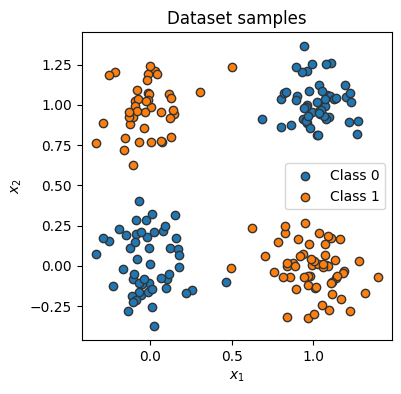

In [118]:
visualize_samples(dataset.data, dataset.label)
plt.show()

#### La clase `DataLoader`

La clase `torch.utils.data.DataLoader` representa un Python iterable sobre un conjunto de datos con soporte para procesamiento por lotes automático, carga de datos multiproceso y muchas más funciones. El cargador de datos se comunica con el conjunto de datos mediante la función `__getitem__` y apila sus salidas como tensores sobre la primera dimensión para formar un lote.
A diferencia de la clase de conjunto de datos, normalmente no tenemos que definir nuestra propia clase de cargador de datos, sino que simplemente podemos crear un objeto con el conjunto de datos como entrada. Además, podemos configurar nuestro cargador de datos con los siguientes argumentos de entrada (solo una selección, consulte la lista completa [aquí](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)):

* `batch_size`: Número de muestras a apilar por lote
* `shuffle`: si es Verdadero, los datos se devuelven en orden aleatorio. Esto es importante durante el entrenamiento para introducir la estocasticidad.
* `num_workers`: Número de subprocesos a utilizar para la carga de datos. El valor predeterminado, 0, significa que los datos se cargarán en el proceso principal, lo que puede ralentizar el entrenamiento de conjuntos de datos en los que cargar un punto de datos lleva una cantidad de tiempo considerable (por ejemplo, imágenes grandes). Se recomiendan más trabajadores para estos, pero pueden causar problemas en computadoras con Windows. Para conjuntos de datos pequeños como el nuestro, 0 trabajadores suelen ser más rápidos.
* `pin_memory`: si es `True`, el cargador de datos copiará los tensores en la memoria fijada de CUDA antes de devolverlos. Esto puede ahorrar algo de tiempo para grandes puntos de datos en las GPU. Por lo general, es una buena práctica para un conjunto de entrenamiento, pero no necesariamente para validación y prueba para ahorrar memoria en la GPU.
* `drop_last`: si es `True`, el último lote se descarta en caso de que sea más pequeño que el tamaño de lote especificado. Esto ocurre cuando el tamaño del conjunto de datos no es múltiplo del tamaño del lote. Solo es potencialmente útil durante el entrenamiento para mantener un tamaño de lote constante.

Creemos un cargador de datos simple a continuación:

In [119]:
data_loader = data.DataLoader(dataset, batch_size=8, shuffle=True)

In [120]:
# next(iter(...)) catches the first batch of the data loader
# If shuffle is True, this will return a different batch every time we run this cell
# For iterating over the whole dataset, we can simple use "for batch in data_loader: ..."
data_inputs, data_labels = next(iter(data_loader))

# The shape of the outputs are [batch_size, d_1,...,d_N] where d_1,...,d_N are the
# dimensions of the data point returned from the dataset class
print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)

Data inputs torch.Size([8, 2]) 
 tensor([[-0.1906,  0.2308],
        [ 0.9943,  0.0062],
        [ 1.0606,  0.0098],
        [ 0.1226,  0.9163],
        [ 1.1000,  0.9237],
        [ 0.9812, -0.0648],
        [ 0.1207,  0.1090],
        [ 0.8006,  0.8609]])
Data labels torch.Size([8]) 
 tensor([0, 1, 1, 1, 0, 1, 0, 0])


### Optimización

Después de definir el modelo y el conjunto de datos, es hora de preparar la optimización del modelo. Durante el entrenamiento realizaremos los siguientes pasos:

1. Obtenga un lote del cargador de datos.
2. Obtenga las predicciones del modelo para el lote.
3. Calcule la pérdida en función de la diferencia entre predicciones y etiquetas.
4. Retropropagación: calcule los gradientes de cada parámetro con respecto a la pérdida.
5. Actualice los parámetros del modelo en la dirección de los gradientes.

Hemos visto cómo podemos realizar los pasos 1, 2 y 4 en PyTorch. Ahora veremos los pasos 3 y 5.

#### Función de pérdida

Podemos calcular la pérdida de un lote simplemente realizando algunas operaciones tensoriales, ya que se agregan automáticamente al gráfico de cálculo. Por ejemplo, para la clasificación binaria, podemos utilizar la entropía cruzada binaria (BCE), que se define de la siguiente manera:

$$\mathcal{L}_{BCE} = -\sum_i \left[ y_i \log x_i + (1 - y_i) \log (1 - x_i) \right]$$

donde $y$ son nuestras etiquetas y $x$ nuestras predicciones, ambas en el rango de $[0,1]$. Sin embargo, PyTorch ya proporciona una lista de funciones de pérdida predefinidas que podemos usar (consulte [aquí](https://pytorch.org/docs/stable/nn.html#loss-functions) para obtener una lista completa). Por ejemplo, para BCE, PyTorch tiene dos módulos: `nn.BCELoss()`, `nn.BCEWithLogitsLoss()`. Mientras que `nn.BCELoss` espera que las entradas $x$ estén en el rango $[0,1]$, es decir, la salida de un sigmoide, `nn.BCEWithLogitsLoss` combina una capa sigmoidea y la pérdida BCE en una sola clase. Esta versión es numéricamente más estable que usar un sigmoide simple seguido de una pérdida BCE debido a los logaritmos aplicados en la función de pérdida. Por lo tanto, se recomienda utilizar funciones de pérdida aplicadas en "logits" siempre que sea posible (¡recuerde no aplicar un sigmoide en la salida del modelo en este caso!). Para nuestro modelo definido anteriormente, utilizamos el módulo `nn.BCEWithLogitsLoss`.

In [121]:
loss_module = nn.BCEWithLogitsLoss()

#### Stochastic Gradient Descent

Para actualizar los parámetros, PyTorch proporciona el paquete `torch.optim` que tiene implementados los optimizadores más populares. Discutiremos los optimizadores específicos y sus diferencias más adelante en el curso, pero por ahora usaremos el más simple de ellos: `torch.optim.SGD`. Stochastic Gradient Descent actualiza los parámetros multiplicando los gradientes con una pequeña constante, llamada tasa de aprendizaje, y restándolos de los parámetros (por lo tanto, minimizando la pérdida). Por lo tanto, avanzamos lentamente hacia la dirección de minimizar la pérdida. Un buen valor predeterminado de la tasa de aprendizaje para una red pequeña como la nuestra es 0,1.

In [122]:
# Input to the optimizer are the parameters of the model: model.parameters()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
#optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
#optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-2)

El optimizador proporciona dos funciones útiles: `optimizer.step()` y `optimizer.zero_grad()`. La función de paso actualiza los parámetros en función de los gradientes como se explicó anteriormente. La función `optimizer.zero_grad()` establece los gradientes de todos los parámetros en cero. Si bien esta función parece menos relevante al principio, es un paso previo crucial antes de realizar la retropropagación. Si llamamos a la función `backward` en la pérdida mientras los gradientes de parámetros son distintos de cero del *batch* anterior, los nuevos gradientes en realidad se agregarían a los anteriores en lugar de sobrescribirlos. Esto se hace porque un parámetro puede aparecer varias veces en un gráfico de cálculo y, en este caso, necesitamos sumar los gradientes en lugar de reemplazarlos. Por lo tanto, recuerde llamar a `optimizer.zero_grad()` antes de calcular los gradientes de un *batch*.

### Entrenamiento

Finalmente, estamos listos para entrenar nuestro modelo. Como primer paso, creamos un conjunto de datos un poco más grande y especificamos un cargador de datos con un tamaño de *batch* mayor.

In [123]:
train_dataset = XORDataset(size=2500, std=0.1)
train_data_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)

Ahora podemos escribir una pequeña función de entrenamiento. Recuerde nuestros cinco pasos: cargar un lote, obtener las predicciones, calcular la pérdida, propagar hacia atrás y actualizar. Además, tenemos que enviar todos los datos y parámetros del modelo al dispositivo de nuestra elección (GPU si está disponible). Para la pequeña red neuronal que tenemos, comunicar los datos a la GPU en realidad lleva mucho más tiempo del que podríamos ahorrar ejecutando la operación en la CPU. Para redes grandes, el tiempo de comunicación es significativamente menor que el tiempo de ejecución real, lo que hace que una GPU sea crucial en estos casos. Aún así, para practicar, enviaremos los datos a la GPU aquí.

In [124]:
# Push model to device. Has to be only done once
model.to(device)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=16, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=16, out_features=1, bias=True)
)

Además, configuramos nuestro modelo en modo de entrenamiento. Esto se hace llamando a `model.train()`. Existen ciertos módulos que necesitan realizar un paso de avance diferente durante el entrenamiento que durante las pruebas (por ejemplo, BatchNorm y Dropout), y podemos cambiar entre ellos usando `model.train()` y `model.eval()`.

In [125]:
def train_model(model, optimizer, data_loader, loss_module, num_epochs=100):
    # Set model to train mode
    model.train()

    # Training loop
    for epoch in range(num_epochs):
        for data_inputs, data_labels in data_loader:

            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.float())

            ## Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero.
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad()
            # Perform backpropagation
            loss.backward()

            ## Step 5: Update the parameters
            optimizer.step()

In [126]:
train_model(model, optimizer, train_data_loader, loss_module)

#### Guardado de modelos

Después de terminar de entrenar un modelo, lo guardamos en el disco para poder cargar los mismos pesos más adelante. Para ello, extraemos el llamado `state_dict` del modelo que contiene todos los parámetros que se pueden aprender. Para nuestro modelo simple, el dictamen estatal contiene las siguientes entradas:

In [57]:
state_dict = model.state_dict()
print(state_dict)

OrderedDict({'linear1.weight': tensor([[-2.6034, -3.3292],
        [ 1.9774, -2.4076],
        [-2.5968, -1.5908],
        [-0.5717, -0.8101]]), 'linear1.bias': tensor([ 1.4459, -1.3992,  2.9882, -0.1375]), 'linear2.weight': tensor([[-4.4623,  3.0885,  4.4030, -0.1377]]), 'linear2.bias': tensor([-1.6853])})


Para guardar el diccionario de estado, podemos usar `torch.save`:

In [58]:
# torch.save(object, filename). For the filename, any extension can be used
torch.save(state_dict, "our_model.tar")

Para cargar un modelo desde un dictado de estado, usamos la función `torch.load` para cargar el dictado de estado desde el disco, y la función del módulo `load_state_dict` para sobrescribir nuestros parámetros con los nuevos valores:

In [59]:
# Load state dict from the disk (make sure it is the same name as above)
state_dict = torch.load("our_model.tar")

# Create a new model and load the state
new_model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
new_model.load_state_dict(state_dict)

# Verify that the parameters are the same
print("Original model\n", model.state_dict())
print("\nLoaded model\n", new_model.state_dict())

Original model
 OrderedDict({'linear1.weight': tensor([[-2.6034, -3.3292],
        [ 1.9774, -2.4076],
        [-2.5968, -1.5908],
        [-0.5717, -0.8101]]), 'linear1.bias': tensor([ 1.4459, -1.3992,  2.9882, -0.1375]), 'linear2.weight': tensor([[-4.4623,  3.0885,  4.4030, -0.1377]]), 'linear2.bias': tensor([-1.6853])})

Loaded model
 OrderedDict({'linear1.weight': tensor([[-2.6034, -3.3292],
        [ 1.9774, -2.4076],
        [-2.5968, -1.5908],
        [-0.5717, -0.8101]]), 'linear1.bias': tensor([ 1.4459, -1.3992,  2.9882, -0.1375]), 'linear2.weight': tensor([[-4.4623,  3.0885,  4.4030, -0.1377]]), 'linear2.bias': tensor([-1.6853])})


Puede encontrar un tutorial detallado sobre cómo guardar y cargar modelos en PyTorch [aquí](https://pytorch.org/tutorials/beginner/served_loading_models.html).

### Evaluación

Una vez que hayamos entrenado un modelo, es hora de evaluarlo en un conjunto de pruebas. Como nuestro conjunto de datos consta de puntos de datos generados aleatoriamente, primero debemos crear un conjunto de prueba con el cargador de datos correspondiente.

In [127]:
test_dataset = XORDataset(size=500)
# drop_last -> Don't drop the last batch although it is smaller than 128
test_data_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False)

Como métrica, usaremos la precisión que se calcula de la siguiente manera:

$$acc = \frac{\#\text{predicciones correctas}}{\#\text{todas las predicciones}} = \frac{TP+TN}{TP+TN+FP+FN}$$

donde TP son los verdaderos positivos, TN los verdaderos negativos, FP los falsos positivos y FN los falsos negativos.

Al evaluar el modelo, no necesitamos realizar un seguimiento del gráfico de cálculo ya que no pretendemos calcular los gradientes. Esto reduce la memoria requerida y acelera el modelo. En PyTorch, podemos desactivar el gráfico de cálculo usando `with torch.no_grad(): ...`. Recuerde configurar adicionalmente el modelo en modo de evaluación.

In [128]:
def eval_model(model, data_loader):
    model.eval() # Set model to eval mode
    true_preds, num_preds = 0., 0.

    with torch.no_grad(): # Deactivate gradients for the following code
        for data_inputs, data_labels in data_loader:

            # Determine prediction of model on dev set
            data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds) # Sigmoid to map predictions between 0 and 1
            pred_labels = (preds >= 0.5).long() # Binarize predictions to 0 and 1

            # Keep records of predictions for the accuracy metric (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]

    acc = true_preds / num_preds
    print(f"Accuracy of the model: {100.0*acc:4.2f}%")

In [129]:
eval_model(model, test_data_loader)

Accuracy of the model: 100.00%


Si entrenamos nuestro modelo correctamente, deberíamos ver una puntuación cercana al 100% de precisión. Sin embargo, esto sólo es posible gracias a nuestra tarea simple y, desafortunadamente, generalmente no obtenemos puntuaciones tan altas en conjuntos de pruebas de tareas más complejas.

#### Visualizando la frontera de decisión

Para visualizar lo que nuestro modelo ha aprendido, podemos realizar una predicción para cada punto de datos en un rango de $[-0.5, 1.5]$ y visualizar la clase predicha como en la figura de muestra al comienzo de esta sección. Esto muestra dónde el modelo ha creado límites de decisión y qué puntos se clasificarían como $0$ y cuáles como $1$. Por lo tanto, obtenemos una imagen de fondo en azul (clase 0) y naranja (clase 1). En los puntos donde el modelo es incierto veremos una superposición borrosa. El código específico es menos relevante en comparación con la figura de salida que, con suerte, debería mostrarnos una separación clara de clases:

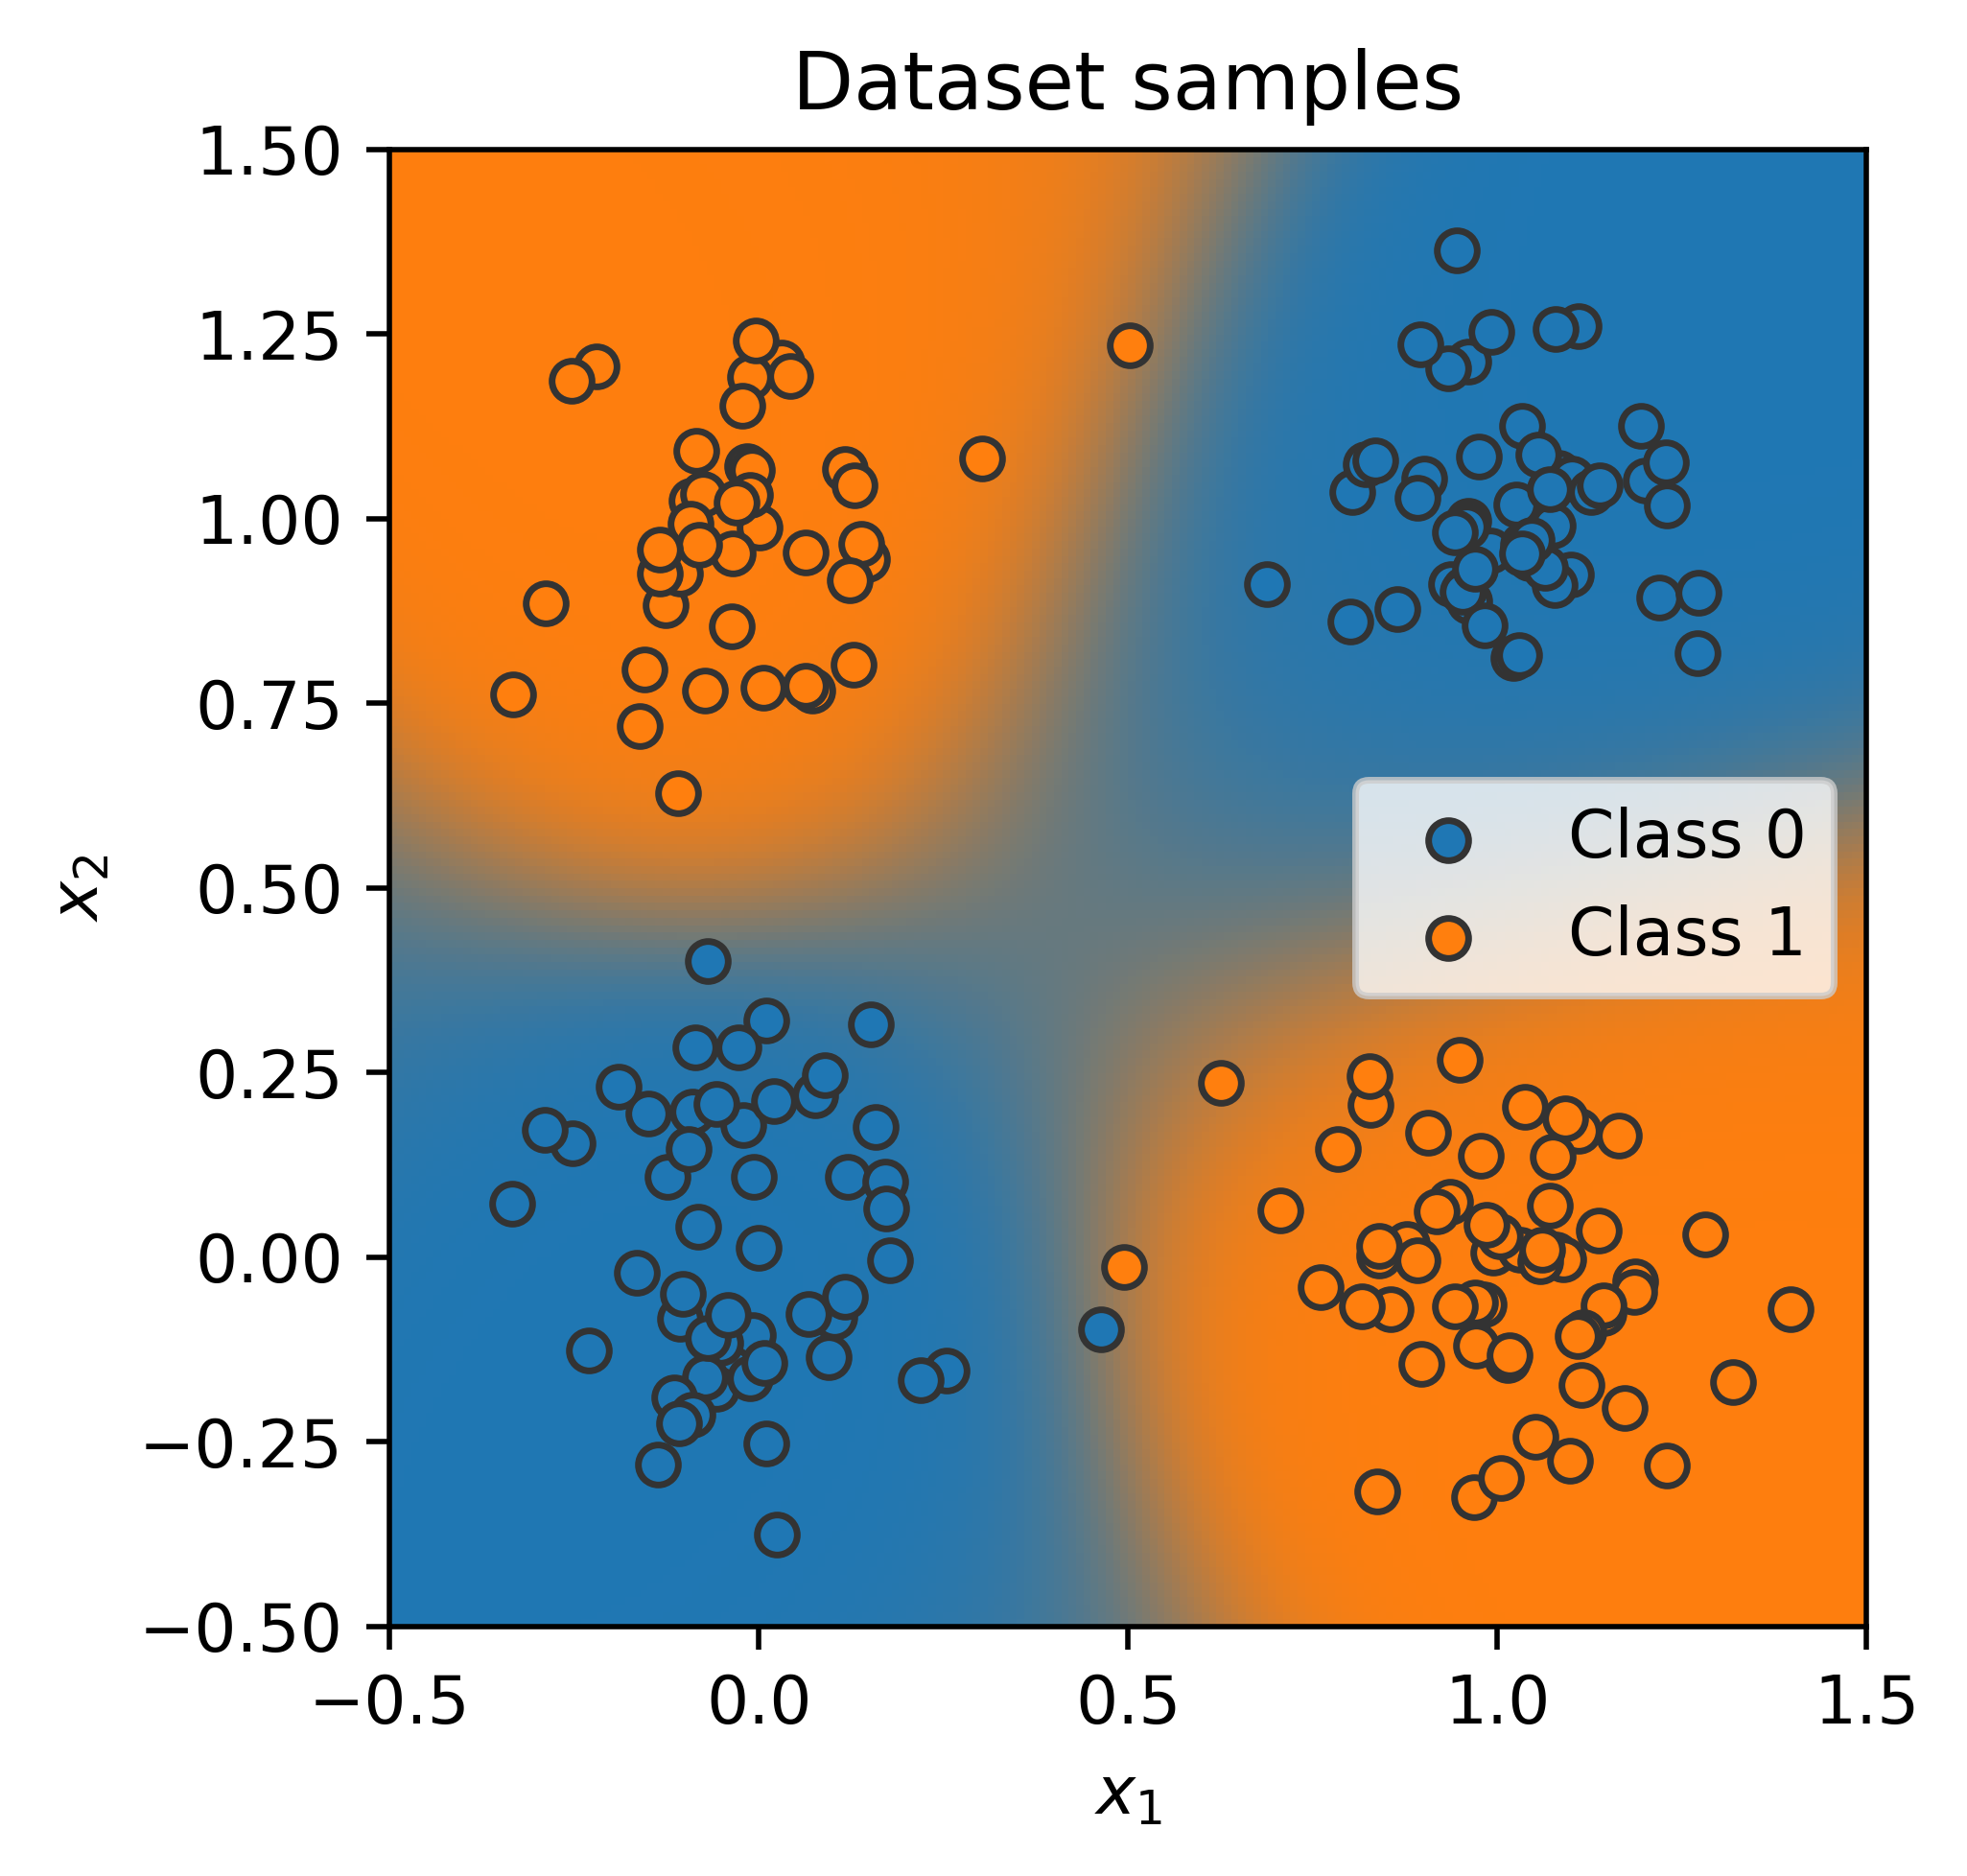

In [130]:
@torch.no_grad() # Decorator, same effect as "with torch.no_grad(): ..." over the whole function.
def visualize_classification(model, data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    fig = plt.figure(figsize=(4,4), dpi=500)
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

    # Let's make use of a lot of operations we have learned above
    model.to(device)
    c0 = torch.Tensor(to_rgba("C0")).to(device)
    c1 = torch.Tensor(to_rgba("C1")).to(device)
    x1 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    x2 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    xx1, xx2 = torch.meshgrid(x1, x2, indexing='ij')  # Meshgrid function as in numpy
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    preds = model(model_inputs)
    preds = torch.sigmoid(preds)
    output_image = (1 - preds) * c0[None,None] + preds * c1[None,None]  # Specifying "None" in a dimension creates a new one
    output_image = output_image.cpu().numpy()  # Convert to numpy array. This only works for tensors on CPU, hence first push to CPU
    plt.imshow(output_image, origin='lower', extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)
    return fig

_ = visualize_classification(model, dataset.data, dataset.label)
plt.show()

Es posible que los límites de decisión no se vean exactamente como en la figura del preámbulo de esta sección, lo que puede deberse a que se ejecuta en una CPU o en una arquitectura de GPU diferente. Sin embargo, el resultado en la métrica de precisión debería ser aproximadamente el mismo.

## Ejemplo: MNIST

En todos los escenarios que actualmente hemos tratado, se manipula información que de un modo u otro ya está preprocesada y almacenada de forma tabular. Sin embargo, como sabemos, existe un área específica del aprendizaje automático que estudia fuentes de información *no estructuradas* como imágenes o texto, más propias del aprendizaje profundo.

El hecho de que haya una metodología exclusiva para este tipo de datos no excluye a los algoritmos clásicos del aprendizaje automático para datos tabulares de que puedan ser usados, por ejemplo, para procesar imágenes. Este hecho se produce, eso sí, en circunstancias muy excepcionales en las que se posee un conocimiento muy profundo de la materia que se aborda, y de algún modo u otro los datos que manipulamos son sencillos.

Tal es el caso del siguiente ejemplo, el popular *dataset* MNIST, en el que disponemos de imágenes de tamaño $28\times 28$ que contienen dígitos del cero al nueve escritos a mano.

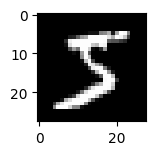

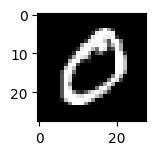

In [100]:
# Importamos librerías
import numpy as np
import matplotlib.pyplot as plt

# Cargamos fichero comprimido con el dataset
mnist_comp = np.load('mnist_compressed.npz')
# Recogemos los distintos archivos
X_train, y_train = mnist_comp['X_train'], mnist_comp['y_train']
X_test, y_test = mnist_comp['X_test'], mnist_comp['y_test']

# Mostramos imágenes de ejemplo
for i in range(2):
  plt.subplot(330 + 1 + i)
  plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
  plt.show()

Como podemos apreciar, la dimensión de estos objetos `X_train` y `X_test` es $(\text{number images}, h, w)$, donde $h=28$ es el alto de cada imagen y $w=28$ el ancho. Actualmente, el enfoque más natural sería emplear redes neuronales convolucionales para afrontar este problema u otra estrategia propia de la visión artificial; sin embargo, para poder interpretar las imágenes como datos tabulares, vamos a aplanar la información de tal manera que se nos quede como $(\text{number images}, 784)$:

In [102]:
# Damos forma "plana" a las imágenes
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

Uno de los problemas al afrontar este problema con técnicas unidimensionales, a la longitud de la infromación (en este caso, $784$). La forma más natural de estudiar este problema sería mediante la **convolución**; sin embargo, dada la gran cantidad de píxeles que parecen carecer de información relevante (debido a que son negros en casi todas las imágenes), podremos establecer un valor **límite** (conocido como *threshold*) para eliminar determinados píxeles (i.e., columnas de nuestros datos):

In [103]:
# Analizamos qué píxeles son prácticamente irrelevantes para el análisis
def near_zero_variance(train_data, test_data, percentile = 50):
  '''
  Dados unos datos, calculamos la desviación típica de las columnas
  y nos quedamos con aquellas cuyo percentil en tal métrica sea superior
  al parámetro introducido. 
  '''
  std_condition = np.percentile(train_data.std(axis = 0), percentile)
  merged_data = np.concatenate((train_data, test_data), axis = 0)
  return merged_data[:train_data.shape[0],merged_data.std(axis = 0)>=std_condition], merged_data[train_data.shape[0]:,merged_data.std(axis = 0)>=std_condition]

En nuestro caso, para mostrar la importancia de tener dominio sobre el tema a abordar, vamos a tomar una muestra del tres por ciento de los píxeles con más variabilidad a partir de nuestro anterior método, y tendremos que ver que con sólo esa cantidad de información somos capaces de entrenar buenos algoritmos de clasificación.

A nivel de preprocesado, dado que las imágenes no son otra cosa que matrices de números enteros comprendidos desde el 0 hasta el 255, haremos una estandarización unitaria dividiendo por este último:

In [104]:
# Aplicamos el método de selección de píxeles relevantes
X_train_reduced, X_test_reduced = near_zero_variance(X_train, X_test, 97)

# Preprocesamos la información total y la reducida simplemente dividiendo por 255
X_train = X_train / 255
X_test = X_test / 255
X_train_reduced = X_train_reduced / 255
X_test_reduced = X_test_reduced / 255

Llegados a este punto, proponemos al lector el siguiente ejercicio: Para los datos originales y los datos reducidos, escriba una red neuronal de clasificación y entrene un modelo siguiendo los pasos anteriores.

### Dataset

In [106]:
from torch.utils.data import Dataset, DataLoader

class MNISTDataset(Dataset):

    def __init__(self, X, y):
        """
        Inputs:
            X: image features
            y: image labels
        """
        super().__init__()
        self.X = X
        self.y = y

    def __len__(self):
        # Number of data point we have. Alternatively self.data.shape[0], or self.label.shape[0]
        return self.X.shape[0]

    def __getitem__(self, idx):
        return {
            'inputs': self.X[idx,:],
            'labels': self.y[idx]
        }

In [108]:
# Verificamos que funciona
batch_size = 64 # entre 8 y 256: 8, 16, 32, 64, 128, 256
train_dts = MNISTDataset(X_train_reduced.astype('float32'), y_train)
train_dtl = DataLoader(train_dts, batch_size = batch_size, shuffle=True)
val_dts = MNISTDataset(X_test_reduced.astype('float32'), y_test)
val_dtl = DataLoader(val_dts, batch_size = batch_size, shuffle=False)
batch = next(iter(train_dtl))
print(batch)

{'inputs': tensor([[0.0000, 0.9922, 0.9882,  ..., 0.3961, 0.9882, 0.9882],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.4118, 0.9686],
        [0.5804, 0.1882, 0.0000,  ..., 0.0000, 0.4471, 0.9882],
        ...,
        [0.9922, 0.9373, 0.6941,  ..., 0.9922, 0.9922, 0.9922],
        [0.0000, 0.0000, 0.0000,  ..., 0.0118, 0.0000, 0.0000],
        [0.1490, 0.6078, 0.9882,  ..., 0.0353, 0.0000, 0.0000]]), 'labels': tensor([1, 7, 9, 2, 9, 3, 9, 3, 8, 6, 7, 2, 9, 1, 8, 9, 7, 9, 6, 1, 5, 8, 2, 1,
        9, 4, 1, 1, 4, 2, 0, 7, 5, 1, 6, 8, 7, 2, 0, 1, 6, 0, 8, 6, 6, 2, 9, 7,
        9, 9, 9, 2, 0, 2, 1, 4, 5, 1, 7, 1, 9, 0, 1, 0], dtype=torch.uint8)}


### Modelo

In [ ]:
import torch
from torch import nn
from torch.optim.lr_scheduler import ExponentialLR, CosineAnnealingWarmRestarts
from typing import List, Optional, Union

class MNISTClassifier(nn.Module):

    def __init__(
            self,
            num_inputs:int,
            num_outputs:int,
            num_hidden:Optional[Union[List[int], int]]=None,
    ):
        super().__init__()
        # Initialize the modules we need to build the network
        if num_hidden is None:
            layers = [nn.Linear(num_inputs, num_outputs)]
        elif isinstance(num_hidden, int):
            layers = [
                nn.Linear(num_inputs, num_hidden),
                nn.GELU(),
                nn.Linear(num_hidden, num_outputs),
            ]
        elif isinstance(num_hidden, list):
            extended_list = [num_inputs] + num_hidden + [num_outputs]
            layers = []
            for i in range(len(extended_list)-1):
                layers += [
                    nn.Linear(extended_list[i], extended_list[i+1]),
                    nn.GELU(),
                ]
            layers = layers[:-1]
        else:
            raise ValueError(f"`num_hidden` debe ser un número entero o una lista de números enteros.")
        
        self.layers = nn.ModuleList(layers)  # ✅ Register layers properly

    def forward(self, x):
        for l in self.layers:
            x = l(x)
        return x

In [139]:
model = MNISTClassifier(
    num_inputs=26,
    num_outputs=10,
    num_hidden=18,
)
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-2)

# Scheduler
scheduler_type = "step"
steps_per_epoch = len(train_dtl)
scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=steps_per_epoch, T_mult=2, eta_min=1e-5)
#scheduler = optim.lr_scheduler.CyclicLR(optimizer, base_lr=1e-5, max_lr=1e-2, step_size_up=steps_per_epoch, mode="triangular2")

## Si queremos aplicar cambios al learning rate al final de cada epoch, usamos como ejemplo otro como este:
#scheduler_type = "epoch"
#scheduler = ExponentialLR(optimizer, gamma=0.99) # https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate

### Entrenamiento

In [ ]:
import wandb
wandb.login(key="1bb44e6be47564584868ec55bac8cf468cf0e47f")

In [134]:
from tqdm import tqdm
import torch

def train_model_wandb(
        model,
        optimizer,
        train_loader,
        eval_loader,
        loss_module,
        scheduler_type="step",
        patience=3,
        patience_factor=0.01,
        num_epochs=100
):
    # Initialize Weights & Biases
    wandb.init(project="mnist-classifier", config={
        "num_epochs": num_epochs,
        "learning_rate": optimizer.param_groups[0]['lr'],
        "optimizer": optimizer.__class__.__name__,
        "architecture": model.__class__.__name__
    })
    
    # Set device
    device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')
    model.to(device)

    # Set metric for callbacks
    best_eval = 0
    pt_epoch = 0

    for epoch in tqdm(range(num_epochs), desc="Epoch Progress"):
        ### Training Phase ###
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_samples = 0

        for batch_idx, data in enumerate(train_loader):
            # Move input data to device (if using GPU)
            data_inputs = data['inputs'].to(device)
            data_labels = data['labels'].to(device)

            # Forward pass
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)  # Ensure shape consistency

            # Compute loss
            loss = loss_module(preds, data_labels)

            # Zero gradients, backpropagate, and update weights
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Track loss for this batch
            batch_loss = loss.item()
            train_loss += batch_loss

            # Compute accuracy (assuming classification task)
            if preds.ndim == 2:  # Softmax case
                preds_classes = preds.argmax(dim=1)
            else:  # Sigmoid case (binary classification)
                preds_classes = (preds > 0.5).long()

            train_correct += (preds_classes == data_labels).sum().item()
            train_samples += data_labels.size(0)

            # Log batch-wise metrics
            wandb.log({
                "batch_loss": batch_loss,
                "batch_step": epoch * len(train_loader) + batch_idx,
                "batch_lr": optimizer.param_groups[0]['lr'],
            })

            # Step-level callback
            if scheduler_type=="step":
                scheduler.step()

        # Compute training metrics
        train_loss /= len(train_loader)
        train_accuracy = train_correct / train_samples

        ### Evaluation Phase ###
        model.eval()
        eval_loss = 0.0
        eval_correct = 0
        eval_samples = 0

        with torch.no_grad():  # Disable gradient tracking
            for data in eval_loader:
                data_inputs = data['inputs'].to(device)
                data_labels = data['labels'].to(device)

                preds = model(data_inputs)
                preds = preds.squeeze(dim=1)

                loss = loss_module(preds, data_labels)
                eval_loss += loss.item()

                if preds.ndim == 2:
                    preds_classes = preds.argmax(dim=1)
                else:
                    preds_classes = (preds > 0.5).long()

                eval_correct += (preds_classes == data_labels).sum().item()
                eval_samples += data_labels.size(0)

        # Compute evaluation metrics
        eval_loss /= len(eval_loader)
        eval_accuracy = eval_correct / eval_samples

        # Log epoch-level metrics
        wandb.log({
            "epoch": epoch,
            "train_loss": train_loss,
            "train_accuracy": train_accuracy,
            "eval_loss": eval_loss,
            "eval_accuracy": eval_accuracy,
            "learning_rate": optimizer.param_groups[0]['lr'],
        })

        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f} - Train Acc: {train_accuracy:.4f} | Eval Loss: {eval_loss:.4f} - Eval Acc: {eval_accuracy:.4f}")

        # Callbacks
        ## Learning rate scheduler
        if scheduler_type=="epoch":
            scheduler.step()
        ## Early stopping
        if eval_accuracy>=best_eval*(1+patience_factor):
            best_eval = eval_accuracy
            pt_epoch = 0
        else:
            pt_epoch += 1
            if pt_epoch>=patience:
                print(f"Epoch {epoch+1}/{num_epochs} - Training interrupted due to early stopping condition.")
                wandb.finish()
                break
            else:
                print(f"Epoch {epoch+1}/{num_epochs} - Current epochs without validation metric improvement {pt_epoch}. {patience-pt_epoch} remaining before stopping.")

    # Finish W&B run
    wandb.finish()

In [ ]:
train_model_wandb(model, optimizer, train_dtl, val_dtl, loss_fn, scheduler_type=scheduler_type, num_epochs=15)